# 0. READ QUESTIONS

1. First you must read dataframe info.
2. You must study the situation
3. You must selec your strategy

# 1. IMPORT LIBRERIES

In [2]:
#import libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORT DATAFRAME

In [3]:
# Import Dataset 

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 3.EXPLORE DATAFRAME

## 3.1 Info

In [16]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 3.2 shape

In [17]:
#shape
df.shape

(48895, 16)

## 3.3 Nul Dataframe

In [18]:
df.isna().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### FIRST CHECK POINT / WRITE CONCLUSIONS

### Conclusions
* We have a 48895 entries and 16 columns
* We have a nulls in: last_review 10052 / reviews_per_month 10052 / host_name 21 / name 16
* Our target variable is Price (dont normalize) if we have machine learning we must take out in train and test.



##### CATEGORIC VARIABLES:
* -name ( is probably that we can Delete later )
* -host_( is probably that we can Delete later )
* -neighbourhood_group
* -neighbourhood
* -room_type

##### NUMERIC VARIABLES:
* -id
* -host_id
* -latitude
* -longitude
* -price
* -minimum_nights
* -number_of_reviews
* -last_review (Delete)
* -reviews_per_month
* -calculated_host_listings_count
* -availability_365


# 4. UNIVARIATE DATA ANALYSIS

## 4.1 Univariate Categorical Data Analysis

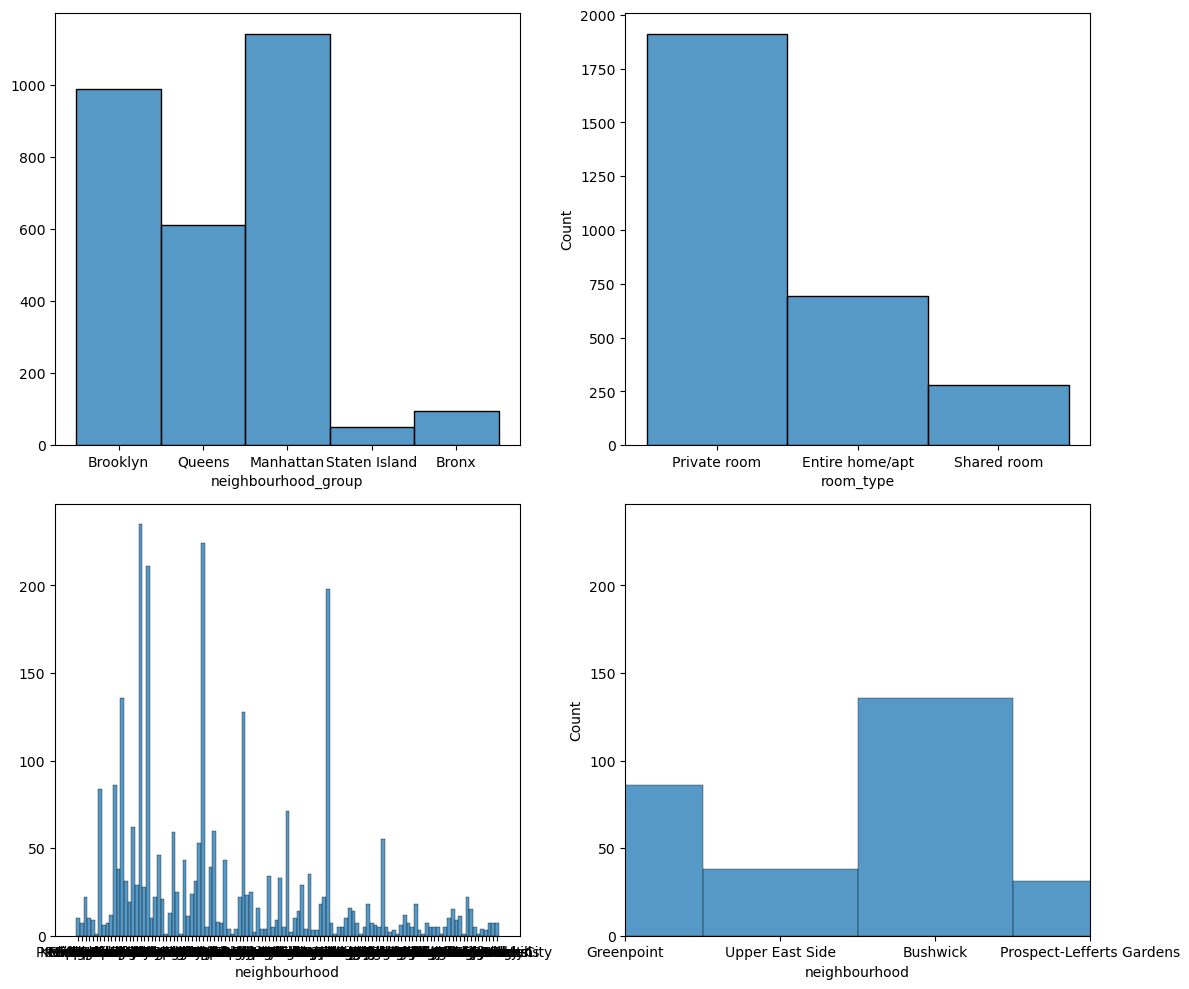

In [48]:
#Grafica de categoricas
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (12,10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "room_type")
sns.histplot(ax = axis[1, 0], data = df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "neighbourhood").set_xlim(10, 13)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### SECOND CHECK POINT / WRITE CONCLUSIONS

### Conclusions
* We only plotting trhee categoric variable because "name" and "hostname" have many entries and this plot is imposible, also those variables are inutils for EDA, we could delete.
* Price is our target. 
* Brooklyn and Manhatan have more than queen, Staten Island and Bronx.
* Neighborhood_group graph: We observe that both Brooklyn and Manhatan are the cities with the greatest offer, so we conclude that it is more touristic.

* Graph room_type: Highlight the lack of shared rooms, so we understand that tourists have capital since generally those who share a room are usually people with low capital (Another issue could be the type of trip and even the traveler's thinking.)
Type of trip could be business, family or love (since they are types of trips where more privacy is sought)
Traveler's thought: We could even think that travelers are more conservative in thought since sharing a room is something more liberal.
* Summary: the main tenant of real estate seems to be a person with medium-high capital, of conservative thinking who travels for business, family or seeking love. The vacation is not ruled out. (Perhaps analyzing the number of rooms and the time can help us define the type of trip.)

* Neighborhood graph: We observe that the neighborhood/neighborhood where there are more homes is Williamsburg. After a generic search on Google, it is observed that there is a great offer of leisure. (See Tripadvisor with 1,707 opinions) It seems to be an alternative neighborhood, rich in cultural offer, so this can destabilize the theory of business travel, although it can also be conjectured that it is where Broadway is, so we would be talking about a too well known place. This implies that perhaps the importance of the place is what makes it so visited and with so many bnb offers.

## 4.2 Univariate Numeric Data Analysis

In [20]:
# Analysis Numeric with numbers
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [21]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.967728e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,3.079382e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,4.072307e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,-7.395568e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,1.060000e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,3.000000e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,5.000000e+00,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,7.200000e-01,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,1.000000e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,4.500000e+01,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


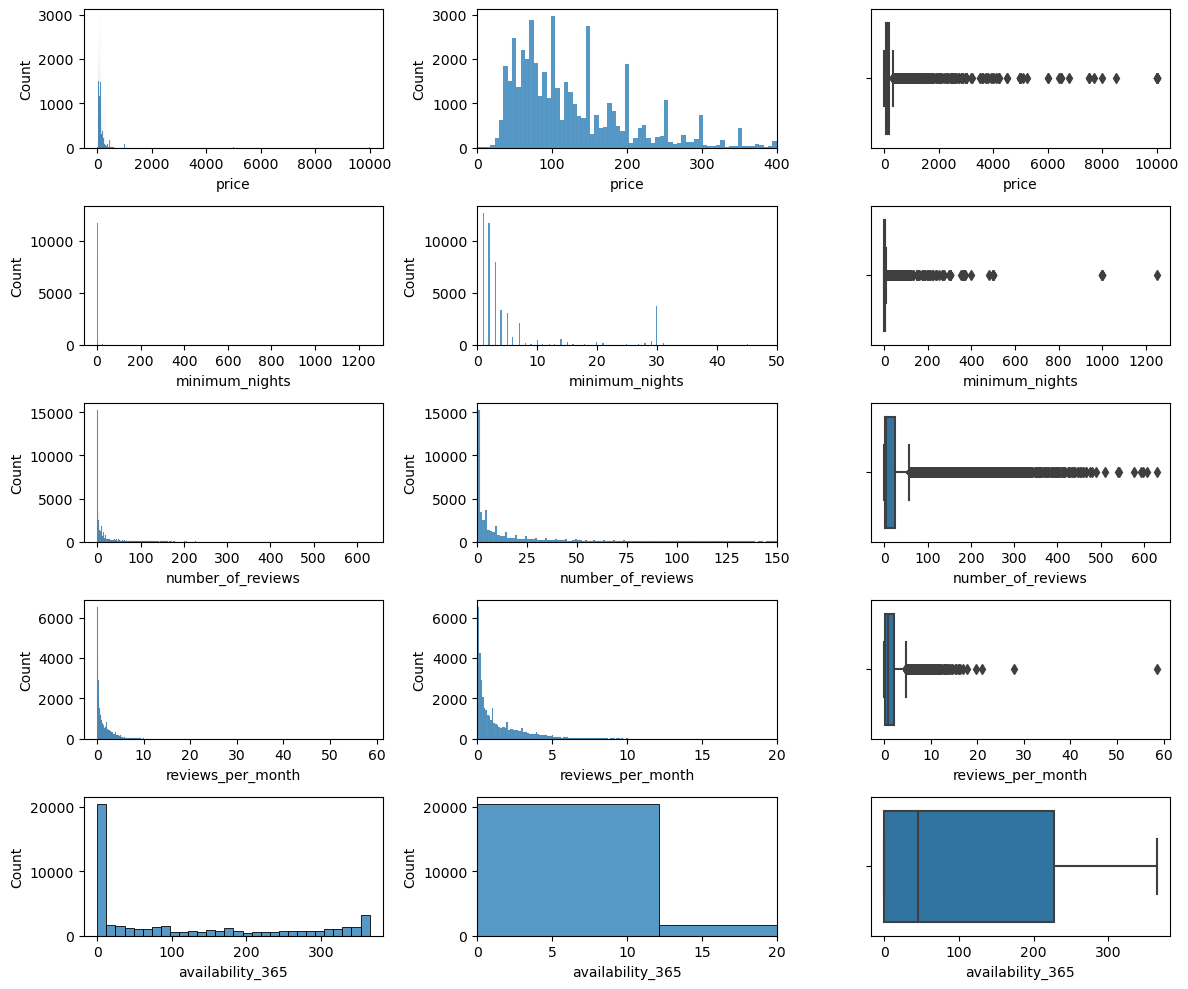

In [22]:
#Grafica de categoricas
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(5, 3, figsize = (12,10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "price").set_xlim(0,400)
sns.boxplot(ax = axis[0, 2], data = df, x = "price")
sns.histplot(ax = axis[1, 0], data = df, x = "minimum_nights")
sns.histplot(ax = axis[1, 1], data = df, x = "minimum_nights").set_xlim(0,50)
sns.boxplot(ax = axis[1, 2], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = df, x = "number_of_reviews").set_xlim(0,150)
sns.boxplot(ax = axis[2, 2], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[3, 0], data = df, x = "reviews_per_month")
sns.histplot(ax = axis[3, 1], data = df, x = "reviews_per_month").set_xlim(0,20)
sns.boxplot(ax = axis[3, 2], data = df, x = "reviews_per_month")
sns.histplot(ax = axis[4, 0], data = df, x = "availability_365")
sns.histplot(ax = axis[4, 1], data = df, x = "availability_365").set_xlim(0,20)
sns.boxplot(ax = axis[4, 2], data = df, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### THIRD CHECK POINT / WRITE CONCLUSIONS

##### GRAPHED NUMERICAL VARIABLES:
* -price
* -minimum_nights
* -number_of_reviews
* -reviews_per_month

* The 8 Graphs:
-The graphs on the left are complete
-The graphs on the right are with x.slim in the area of ​​the graph with more interest. In this way we can observe the most relevant data without losing information.
-The Boxplot graph allows us to see the outliers that make the first graph come out so big.

##### PRIMARY FINDINGS

* Price graph: We observe that the highest price is between 100-110 dollars/day with a similar rebound at 150 dollars, therefore they are standard price bnb. It is observed that the landlords are people who do not know how to speculate with advertising and prices because in the graph on the right it is observed how standard prices are always round, therefore, Someone who has a bnb within the roundest values, the same by reducing 10 dollars, could considerably increase their clientele.

* graph minimum_nights: The most existing minimum night is 1 night, followed by 2 nights and continuously decreasing. It is curious how it is observed that there is a great rebound of 30 days (1 month). This indicates that said owners are surely more conservative in terms of the property, since they seek to secure smaller economic amounts but with less work.

* Graph number_of_reviews: It is observed that there is a great lack of opinions on the part of bnb tenants. Therefore, bnb with opinions will surely have a better reception, so it would be interesting if it were the owner to encourage reviews. Another issue may be that it is not rented as much, and since it is not rented, reviews are not generated.

* reviews_per_month graph: The highest reviews per month is 0. Matches the number_of_reviews graph.

* These graphs have practically the majority of data in the 1st quartile.

# 5. MULTIVARIATE VARIABLES ANALYSIS

## 5.1 Numerical-numerical analysis

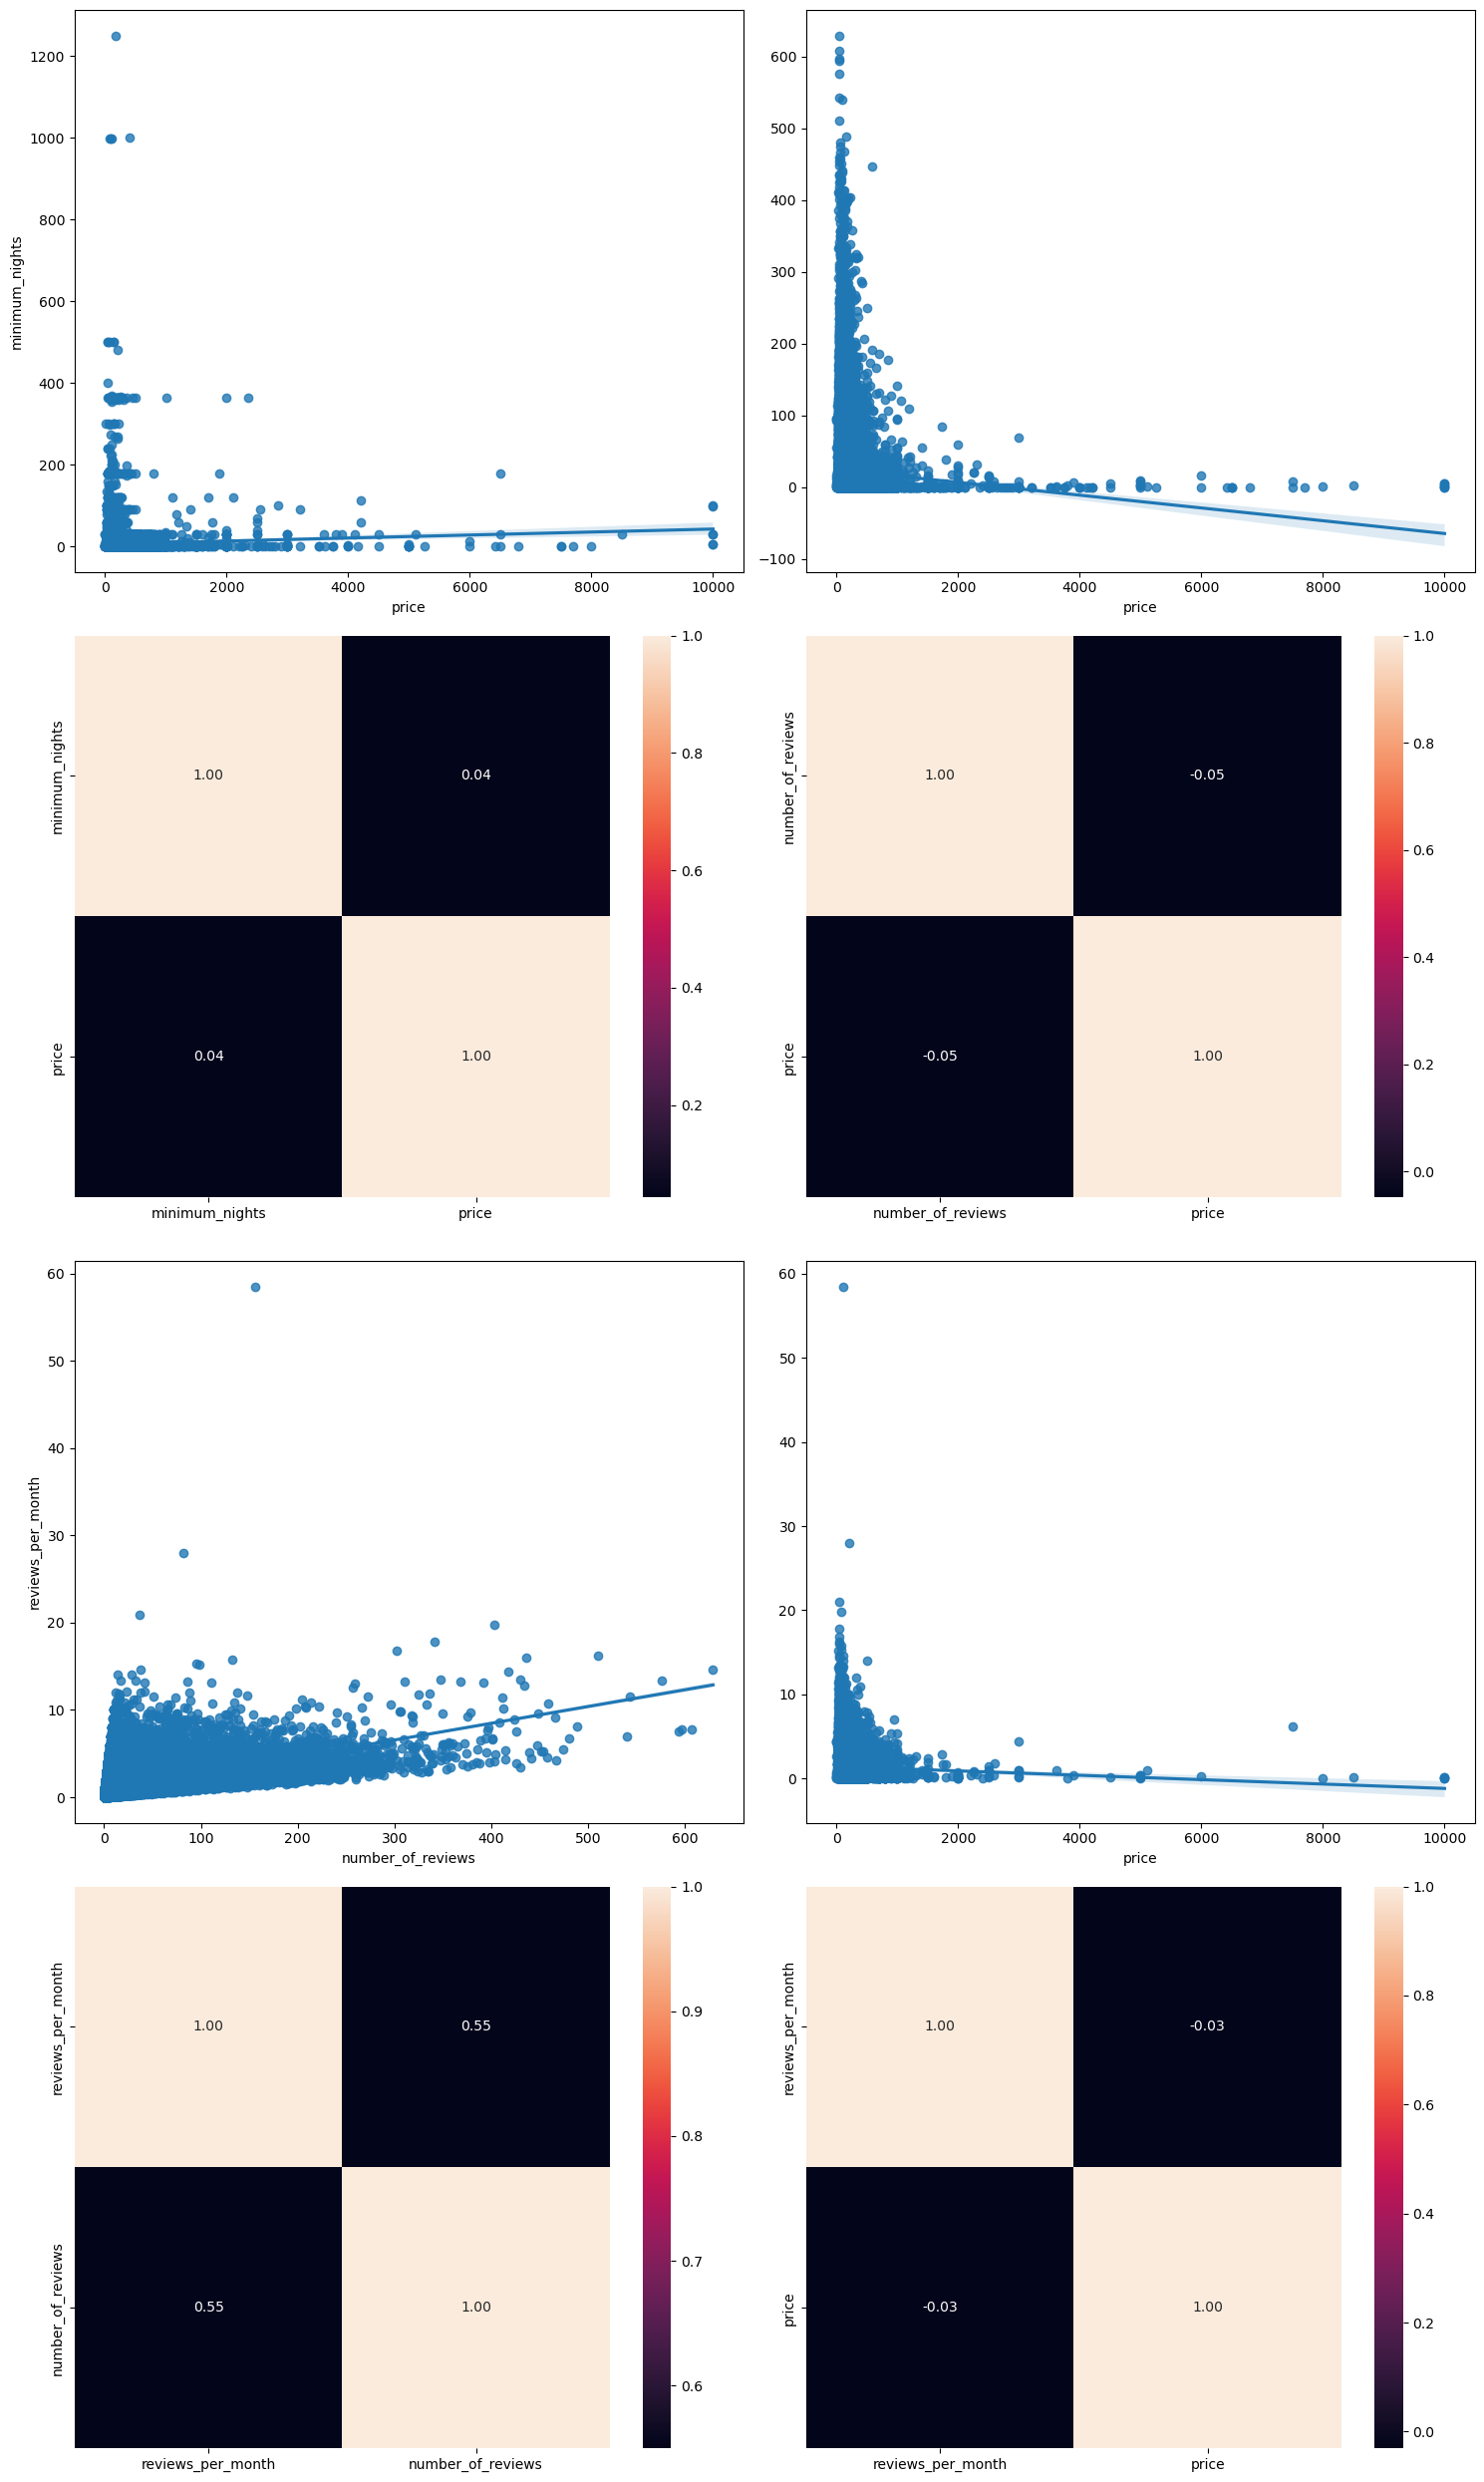

In [23]:
#NUMERIC NUMERIC
fig, axis = plt.subplots(4, 2, figsize = (15, 25))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "price", y = "minimum_nights")
sns.heatmap(df[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True) # False = Pone una grafica para ambos / En True pone escala para cada uno
sns.regplot(ax = axis[0, 1], data = df, x = "price", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(df[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "number_of_reviews", y = "reviews_per_month")
sns.heatmap(df[["reviews_per_month", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = True)
sns.regplot(ax = axis[2, 1], data = df, x = "price", y = "reviews_per_month").set(ylabel=None)
sns.heatmap(df[["reviews_per_month", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

##### NUMERICAL VARIABLES GRAPHED MULTIVARIABLE:

-price and minimum_nights
-price and number_of_reviews
-number_of_reviews and reviews_per_month
-price reviews_per_month

##### PRIMARY FINDINGS
* We can observe how there is practically no relationship between all the numerical variables compared.
* Removing the Outliers the line would be straight.

# 5.2 Categorical-Categorical analysis

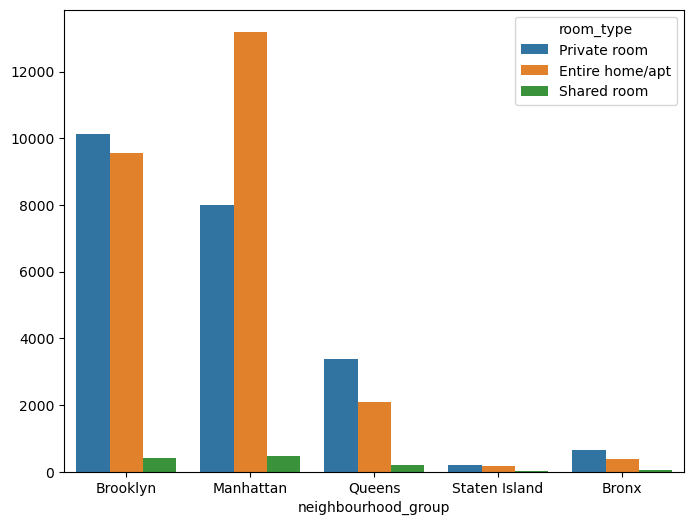

In [24]:
# Categorical - Categorical Analysis - The Class and Several Predictors

#CATEGORICAL CATEGORICAL

# Crear la figura y los ejes
fig, axis = plt.subplots(figsize=(8, 6))

# Graficar utilizando countplot
sns.countplot(ax=axis, data=df, x="neighbourhood_group", hue="room_type")

# Personalizar los ejes y las etiquetas
axis.set_ylabel(None)

# Mostrar el gráfico
plt.show()

### FOURTH CHECK POINT / WRITE CONCLUSIONS

##### GRAPHED MULTIVARIABLE CATEGORICAL VARIABLES:

-neighbourhood_group and room_type

##### PRIMARY FINDINGS

* The table shows that, as a general rule, the number of private rooms is usually higher in most places than the number of apartments, except in a very differentiated way in Manhattan.

* This may indicate that perhaps in Manhattan there are large investors who speculate with entire houses, however in the rest, it could be observed that the majority of BNB landlords are low capital since more rooms are rented (for example, renting a room in the house).

* We observe how in Brooklyn the number of apartments or houses is even with the number of rooms, we could observe a greater democratization of housing perhaps, or of the capital itself.

## 5.3 MULTIVARIABLE


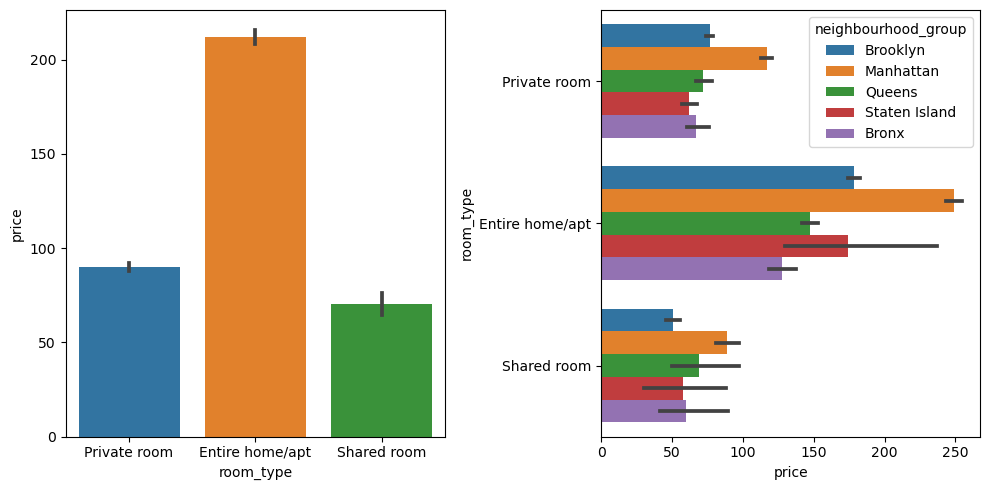

In [25]:
# MULTIVARIABLE
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)
sns.barplot(ax = axis[0], data = df, x = "room_type", y = "price")
sns.barplot(ax = axis[1], data = df, x = "price", y = "room_type", hue = "neighbourhood_group")

plt.tight_layout()

plt.show()

# 6. TOTAL COMPARATION

##### MULTI-VARIABLE

* Graph 1 CATEGORICAL-NUMERICAL: Price/Room_type
* Graph 2 MULTIVARIABLE: Price / room_type/ Neighborhood_group

##### PRIMARY FINDINGS

* Graph 1: It is understood by logic that the prices of properties or complete apartments are higher, but it is curious how the price of shared rooms with private rooms does not have so much difference. This can make you understand why there are so few people who rent shared rooms, since for a price not much higher you can have the comfort of a private room.

* Graph 2:
1. Manhatan: It is observed how in Manhatan the prices are the highest in the 3 rentable elements, something that does not attract attention based on the previous graphs and giving veracity to the conclusions already proposed.

2. Brooklyn: In Brooklyn it happens the same as in Manhattan except in the case of shared rooms. This may indicate that Brooklyn may be a more youthful city, open-minded and more focused on leisure, in fact, the average price in Brooklyn for this type of rental is the lowest in the comparison.

3. Queen: As in Manhatan 1st Apartments, 2nd private rooms and 3rd shared rooms. Nothing surprising.

4. Staten Island: In this case an apparent absence phenomenon occurs. As there is no large number of bnb properties to rent, prices are on the rise for apartments. This is such that it is where there are more outliers, so if you have to invest it could be a good place according to the lack of competition and high prices (In fact, it has almost the same price in private rooms as Brooklyn).

5. Bronx: It is observed that it is surely the poorest area, since shared rooms exceed Brooklyn and Staten Island, so it may not be the best place to invest in apartments or private rooms.

6. It should be noted that prices are more variable (according to the greater number of outliers, it is in shared rooms, suggesting a clear speculative price bubble, especially in: QueenStaten, Island, Bronx)

# 6.1 Factorice Categorical Data

In [26]:
df['room_type_f'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_f'] = pd.factorize(df['neighbourhood_group'])[0]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,1


# 6.2 Comparation total numeric variables

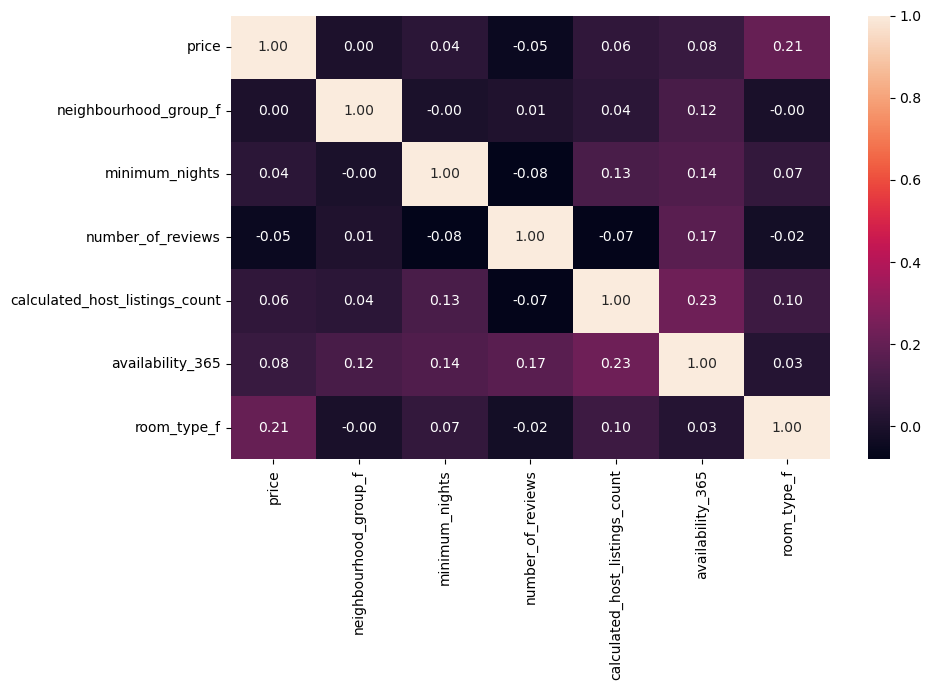

In [27]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["price","neighbourhood_group_f", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365", "room_type_f"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


### SIXTH CHECK POINT / WRITE CONCLUSIONS

* Only we can see a slight relationship between price and roomtype (0.21) and availability_365 (023). 

# OPTIONAL: SEE COMPARATION WITH LINE REGRETION

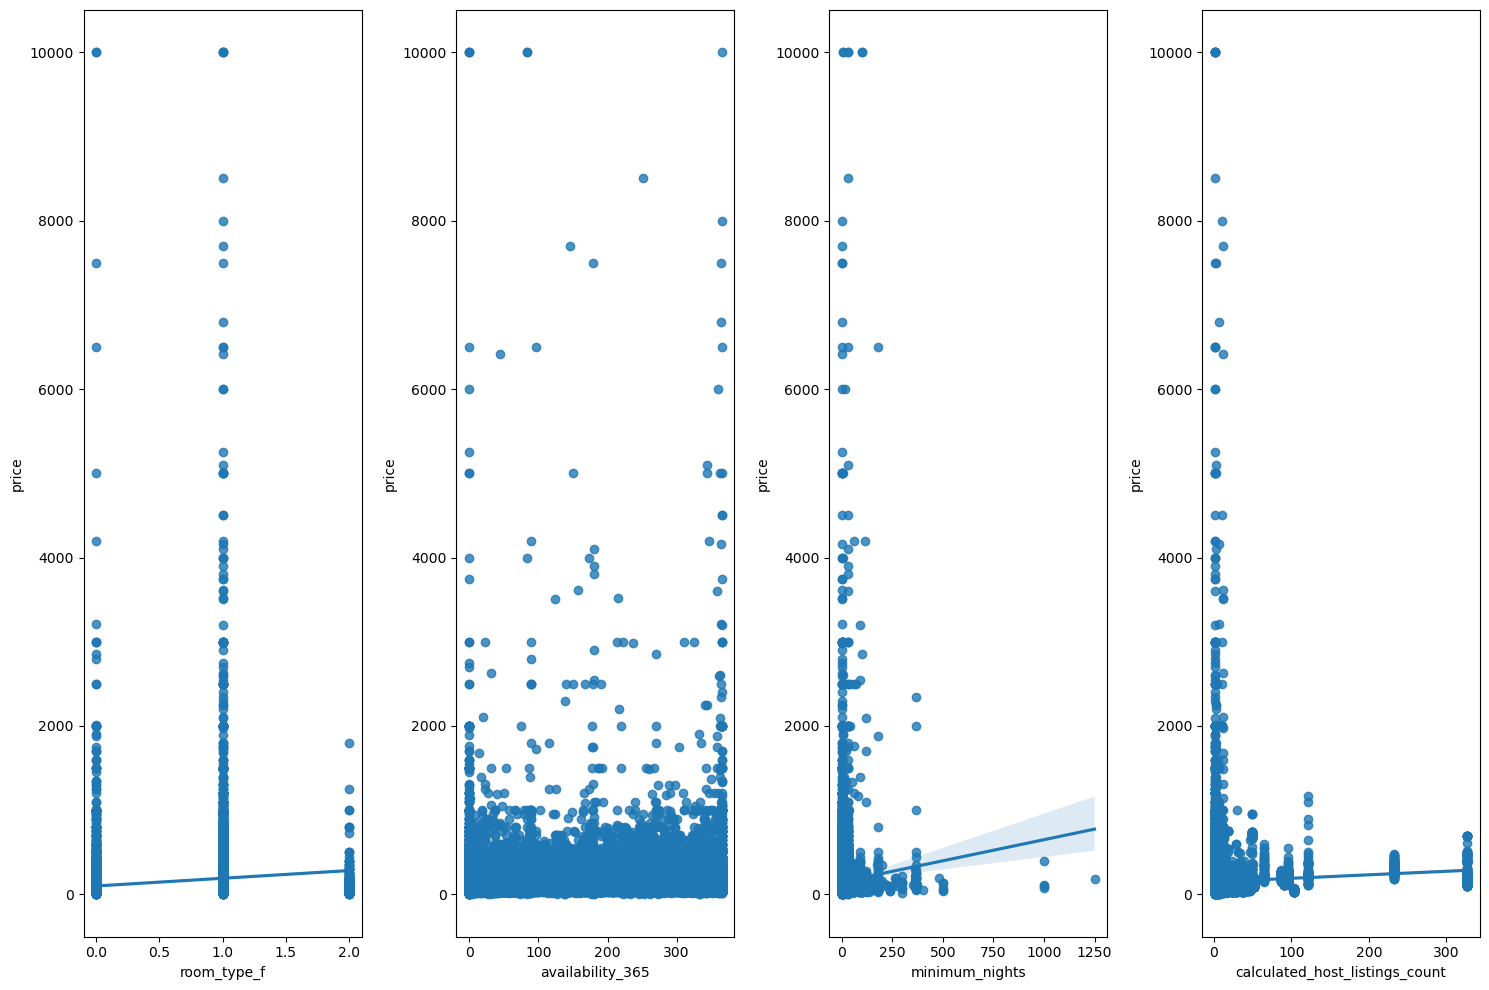

In [28]:
# Regplot the strong relationship Features (estos son cuadros de regresión lineal)

fig, axis = plt.subplots(figsize = (15, 10), ncols = 4)

# Plot the Data (WE USE REGPLOT FOR THIS METODH IS GOOD FOR LINEAL REGRESION)

sns.regplot(ax=axis[0], data=df, x='room_type_f', y='price')
sns.regplot(ax=axis[1], data=df, x='availability_365', y='price')
sns.regplot(ax=axis[2], data=df, x='minimum_nights', y='price')
sns.regplot(ax=axis[3], data=df, x='calculated_host_listings_count', y='price')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()



* perhaps price and minimun_nights but, is interesting see this graph when we delete outliers.

# 7. FEATURE ENGINEERING

## 7.1 OUTLIER ANALISYS

In [29]:
# Describe of Features

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


### NINTH CHECK POINT / WRITE CONCLUSIONS

* In this Df is important see price, minimum_nights
* perhaps we can delete outliers in calculated_host_listings_count for see compare. 

## 7.2 OUTLIER ANALISYS: SEE IQR FOR DELETE OUTLIERS

### We use this metodh for all variables that we think that have outliers

In [30]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [31]:
# INTERQUARTILE RANGE PRICE
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [32]:
minimum_nights_stats = df["minimum_nights"].describe()
minimum_nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [33]:
# INTERQUARTILE RANGE NIGHTS

minimum_nights_stats_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * minimum_nights_stats_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * minimum_nights_stats_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(minimum_nights_stats_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [34]:
calculated_host_listings_count_stats = df["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [35]:
# INTERQUARTILE RANGE HOST LISTINGS
calculated_host_listings_count_iqr = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_limit = calculated_host_listings_count_stats["75%"] + 1.5 * calculated_host_listings_count_iqr
lower_limit = calculated_host_listings_count_stats["25%"] - 1.5 * calculated_host_listings_count_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(calculated_host_listings_count_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [36]:
#ELIMINACION DE OUTLIERS

df = df[df["price"] > 0]                                 
df = df[df["calculated_host_listings_count"] > 4]
df = df[df["minimum_nights"] <= 10]

## 7.3 NULL ACTIONS

In [37]:
#COMPROBAR LOS NULOS
df.isnull().sum().sort_values(ascending=False)
#Los nulos estan en Columnas que no parecen relevantes para el modelo.


reviews_per_month                 415
last_review                       415
name                                1
id                                  0
room_type_f                         0
availability_365                    0
calculated_host_listings_count      0
number_of_reviews                   0
minimum_nights                      0
price                               0
room_type                           0
longitude                           0
latitude                            0
neighbourhood                       0
neighbourhood_group                 0
host_name                           0
host_id                             0
neighbourhood_group_f               0
dtype: int64

In [38]:
#FORGET COLUMS
df = df.drop(['last_review', "name", "host_name", "id", "host_id", "latitude", "longitude" ,"reviews_per_month"], axis=1)
print(df)

#we could have eliminated before but we have delene now for to have the exercise. 
#We havent eliminated or transformate nulls.


      neighbourhood_group   neighbourhood        room_type  price  \
0                Brooklyn      Kensington     Private room    149   
21               Brooklyn      Park Slope     Private room    130   
22               Brooklyn      Park Slope     Private room     80   
23               Brooklyn      Park Slope     Private room    110   
92               Brooklyn    Clinton Hill     Private room     98   
...                   ...             ...              ...    ...   
48857              Queens       Woodhaven  Entire home/apt     85   
48867            Brooklyn       Gravesend      Shared room     25   
48868            Brooklyn       Gravesend      Shared room     25   
48878              Queens        Elmhurst     Private room     45   
48893           Manhattan  Hell's Kitchen      Shared room     55   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                   1                  9                               6   
21                 

### TENTH CHECK POINT / WRITE CONCLUSIONS

* Delete colums, we havent nulls

# 8 FEATURE SCALLING

## 8.1 MIN MAX SCALER FEATURES

In [39]:
from sklearn.preprocessing import MinMaxScaler
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group_f", "room_type_f"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_f,room_type_f,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.111111,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.111111,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.666667,0.003106,0.506849,0.0,0.0,98


## 8.2 FEATURE SELECTION

In [40]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type_f
0,0.111111,0.003106,0.969863,0.0
1,0.000000,0.000000,0.473973,0.0
2,0.111111,0.015528,0.975342,0.0
3,0.000000,0.012422,0.747945,0.0
4,0.111111,1.000000,0.802740,0.5


In [47]:
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)
X_train_sel.to_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/15 EDA/TRAIN.csv', index=False)
X_test_sel.to_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/15 EDA/TEST.csv', index=False)

MACHINE LEARNING. 

SELECT THE BEST METODH